# **Introduction to Data Science**
# **DS-2001**
# Project


Solution designed by:

Muddassir Asghar - i23-2577

M. Abdullah Ali - i23-2523

Introduction:
Imtiaz Mall, a renowned department store chain, is experiencing declining sales and a significant
number of non-recurring customers in its electronics section. To address this challenge, you, the
newly appointed Senior Data Scientist, have been tasked with conducting a comprehensive
analysis of the electronics section data and developing data-driven strategies for customer
retention and sales growth. This project focuses on the initial steps of this analysis, specifically
exploring the data through various techniques.

Before we begin, necessary libraries are imported

## **Program prerequisites**

In [1172]:
# import ur libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.cluster import KMeans

## **Module 1: Data Acquisition and Preprocessing:**

### 1. Data Loading:

The data specific to the project requirements is loaded into the program.

In [1176]:
df = pd.read_json('electronics.json')
df.head(10)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter,1
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall,1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter,1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall,1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer,1
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,08,1989,Spring,1
6,e67f67b2-12f2-4b0c-b027-19cb052b3dd8,,Female,,"166 Johnny Mount Suite 366\nKimberlyberg, KS 6...",878c7ab1-ec62-4fc5-9061-6bed5db334f6,2021-12-22,8f399675-5c05-4bef-b5d1-863ec387e70a,Clothing,Brand_C,441,41,6,9,Medium,04,1973,Fall,1
7,80a5d367-b3dc-4c18-8a93-584e7c5e7e29,23,Female,High,"203 Tiffany Hill Suite 971\nPort Josetown, VI ...",e88c395b-2e4e-4d97-bbdb-0cc321168753,2022-09-30,f2f4088c-8822-4532-8b4d-ae4ed9ff2e1c,Clothing,Brand_A,390,42,9,2,Low,04,1976,Winter,1
8,,22,Male,Low,"76417 Johnson Flat Suite 425\nCrystalchester, ...",cdae113e-9cb5-4a30-92f9-2c5637044d2a,2023-08-19,06bd8738-5110-49bd-abeb-1abdb3ce7f6b,,Brand_C,297,49,4,5,Low,11,2018,Fall,1
9,a9dc9153-9750-471a-8a90-7c46292fc34c,80,Female,High,Unit 3169 Box 6845\nDPO AA 27380,24577c38-d74b-41a3-a944-2d32510b842b,2020-07-20,ee4c9e6c-801d-425d-ae12-589570ab3a66,Books,Brand_A,84,61,2,7,High,09,,Fall,1


In [1177]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month'],
      dtype='object')

In [1178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

In [1179]:
df = df[df['Product_Category'] == 'Electronics']
df = df.drop(['Product_Category'], axis=1)  
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Brand_A,197,100,9,1,Low,,1995,Winter,1
15,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Brand_B,272,18,10,3,Medium,04,2019,Winter,1
16,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,,241,26,8,5,Hidden,09,1978,Summer,1
17,ffb65cd7-4329-4abb-b076-05eb7cf933e0,68,Female,,"7417 Gregory Garden\nJordanborough, MT 88106",27a18611-855f-4db3-ad4e-77b008695f09,2022-06-25,,Brand_B,115,31,4,4,Low,10,1972,Summer,1
20,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Brand_C,370,13,2,8,High,05,1991,Summer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,ae452c82-be49-4f19-a735-5508e05eb37d,50,Male,Medium,"0587 Roger Village Suite 169\nEast Meganton, D...",320e2200-fd01-4137-9cda-4131bf469c1b,2022-07-17,d7a7e74a-bc19-4b4f-b8c8-60ce07797a4c,Brand_B,39,38,7,10,High,03,2004,Fall,1
990,0a4d6275-f4c9-479d-848e-9ae19eb136fc,38,Other,High,Unit 7320 Box 3586\nDPO AA 76845,d9f9dd67-3826-46ac-aab8-64fb8f7d636d,2020-12-08,002c5e15-47ab-452a-aa2e-b03146bc9462,Brand_B,287,19,6,3,Medium,11,,Spring,1
991,62c73378-cfbf-4896-9243-61de7de9acc7,37,Female,Low,"91116 Bradley Islands\nWest Meghan, PR 35083",adf48b82-b240-4827-b03a-c8d37a8d3e4c,2020-10-05,3ce3fd4f-4a0e-4c99-abbe-a4926ad76e9e,Brand_A,222,,1,10,High,,2011,Summer,0
993,53c5fb01-3ee3-4cad-beab-fcfa3c03bfe3,57,Male,Medium,"7406 Pugh Roads Apt. 254\nBeardfurt, MA 17468",16642cb2-49d1-43ee-a37e-0c59a14bfc50,2022-08-25,41cf36ca-c19d-4fee-b894-68b5afcf186d,Brand_C,127,59,10,8,Low,05,1990,Fall,1


In [1180]:
int_columns = [
    "Age",
    "Purchase_Amount",
    "Average_Spending_Per_Purchase",
    "Purchase_Frequency_Per_Month",
    "Brand_Affinity_Score",
    "Month",
    "Year",
]

for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

df = df.replace('', np.nan)

df["Will_Purchase_Next_Month"] = df["Will_Purchase_Next_Month"].astype(bool)

def convert_to_days(date):
    if isinstance(date, str) and date != "Hidden":
        try:
            return datetime.strptime(date, "%Y-%m-%d").toordinal()
        except ValueError:
            return None 
    return None 

# Ensure the "Purchase_Date" column is clean before applying the function
df["Days"] = df["Purchase_Date"].apply(convert_to_days).astype("Int64")
int_columns.append('Days')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 2 to 995
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    346 non-null    object
 1   Age                            343 non-null    Int64 
 2   Gender                         346 non-null    object
 3   Income_Level                   339 non-null    object
 4   Address                        343 non-null    object
 5   Transaction_ID                 344 non-null    object
 6   Purchase_Date                  338 non-null    object
 7   Product_ID                     344 non-null    object
 8   Brand                          336 non-null    object
 9   Purchase_Amount                338 non-null    Int64 
 10  Average_Spending_Per_Purchase  346 non-null    Int64 
 11  Purchase_Frequency_Per_Month   327 non-null    Int64 
 12  Brand_Affinity_Score           328 non-null    Int64 
 13  Product_Ca

In [1181]:
df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Days
count,343.0,338.0,346.0,327.0,328.0,329.0,340.0,335.0
mean,49.865889,242.727811,49.069364,5.504587,5.314024,6.884498,1995.347059,738139.629851
std,18.424957,139.811689,27.412381,2.927416,2.836339,3.342087,15.309496,422.653849
min,18.0,10.0,5.0,1.0,1.0,1.0,1970.0,737427.0
25%,34.0,121.25,26.0,3.0,3.0,4.0,1983.0,737766.0
50%,50.0,228.5,45.0,6.0,5.0,7.0,1994.0,738132.0
75%,67.0,358.75,72.75,8.0,8.0,10.0,2010.0,738504.5
max,80.0,496.0,100.0,10.0,10.0,12.0,2023.0,738855.0


In [1182]:
df.describe(include="object")

,Customer_ID,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Brand,Product_Category_Preferences,Season
count,346,346,339,343,344,338,344,336,346,344
unique,343,4,4,339,343,292,343,4,4,5
top,Hidden,Other,Medium,Hidden,Hidden,2022-06-07,Hidden,Brand_C,Medium,Winter
freq,4,127,123,5,2,3,2,129,121,90


### 2. Data Cleaning:

o Identify and handle missing values using appropriate techniques like
mean/median imputation or dropping rows/columns with excessive missingness.

In [1185]:
df.isnull().sum()

Customer_ID                       9
Age                              12
Gender                            9
Income_Level                     16
Address                          12
Transaction_ID                   11
Purchase_Date                    17
Product_ID                       11
Brand                            19
Purchase_Amount                  17
Average_Spending_Per_Purchase     9
Purchase_Frequency_Per_Month     28
Brand_Affinity_Score             27
Product_Category_Preferences      9
Month                            26
Year                             15
Season                           11
Will_Purchase_Next_Month          0
Days                             20
dtype: int64

In [1186]:
df.isnull().any(axis=1).sum()

199

In [1187]:
df.head(10)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Brand_A,197,100,9,1,Low,<NA>,1995,Winter,True,738133
15,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Brand_B,272,18,10,3,Medium,4,2019,Winter,True,738674
16,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,NaN,241,26,8,5,Hidden,9,1978,Summer,True,738162
17,ffb65cd7-4329-4abb-b076-05eb7cf933e0,68,Female,NaN,"7417 Gregory Garden\nJordanborough, MT 88106",27a18611-855f-4db3-ad4e-77b008695f09,2022-06-25,NaN,Brand_B,115,31,4,4,Low,10,1972,Summer,True,738331
20,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Brand_C,370,13,2,8,High,5,1991,Summer,True,738121
24,0d187b13-1a29-4421-ae2c-c0c378cc8910,19,Male,Medium,"595 Friedman Tunnel\nLake Jorgetown, NM 14564",58740f61-e34e-4fa6-a72e-a0052e39650d,2022-04-05,20d9b5b4-f26d-4442-ac20-a1d384cd0bc4,Brand_B,485,38,<NA>,5,Low,8,<NA>,Summer,False,738250
28,b3edefd3-68f1-4d4c-a182-28ea8231d858,26,Other,Low,"878 Harry Drives Suite 831\nBaldwinshire, WY 8...",4fd31d6c-ba4d-4fac-84f8-3d4d94f8a155,2020-03-04,b8c2a74e-93eb-4f21-800f-f67367a1bae9,Brand_C,257,41,10,10,Low,6,1980,Summer,True,737488
30,9649b4e5-3d50-4863-bbe2-c3c4d9355d6d,79,Female,High,"387 Simpson River Suite 295\nEast Michaelstad,...",7fe28782-64a3-4f6e-9a0e-b86475279ab9,2023-05-19,61e7872d-7e07-4695-9eb2-468827b50988,Brand_C,423,71,9,8,High,11,2017,Summer,True,738659
32,5d1235b6-5649-413b-a5ff-5e40eef5cd7e,67,Male,High,"07678 Hicks Lodge\nJillfort, NE 98456",Hidden,2021-06-24,39d8b7a6-412d-47af-8270-8af963238914,Brand_A,331,9,9,2,High,4,1985,Summer,True,737965
33,e1b8b270-b93e-419c-a11e-0142fe28352f,20,Other,Medium,Unit 8459 Box 2717\nDPO AE 81307,8618ea6a-45b9-4566-8b80-97ac1a6e6ffd,2020-10-07,f69fb90d-252a-4b87-b248-2392186b7461,Brand_A,111,94,8,10,Low,4,1986,Winter,True,737705


In [1188]:
def int_cols_plot(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(16, 6))
        
        # Plot 1: Histogram with KDE
        plt.subplot(1, 3, 1)
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue', alpha=0.6)
        plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df[column].mean():.2f}")
        plt.axvline(df[column].median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {df[column].median():.2f}")
        plt.title(f"Distribution of {column}")
        plt.legend()
        
        # Plot 2: Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], color='orange')
        plt.title(f"Boxplot of {column}")
        
        plt.tight_layout()
        plt.show()

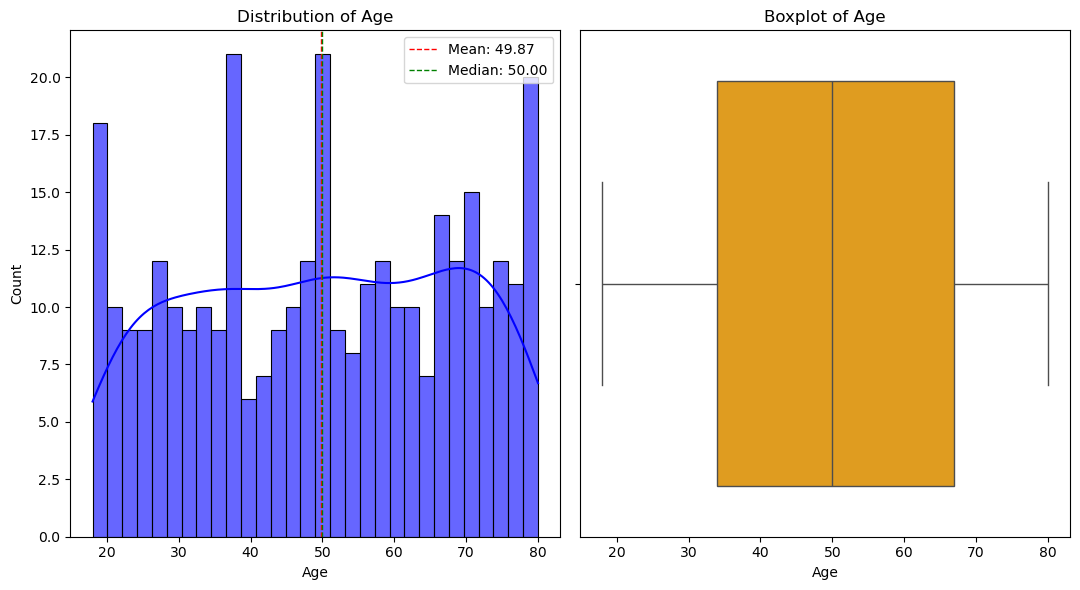

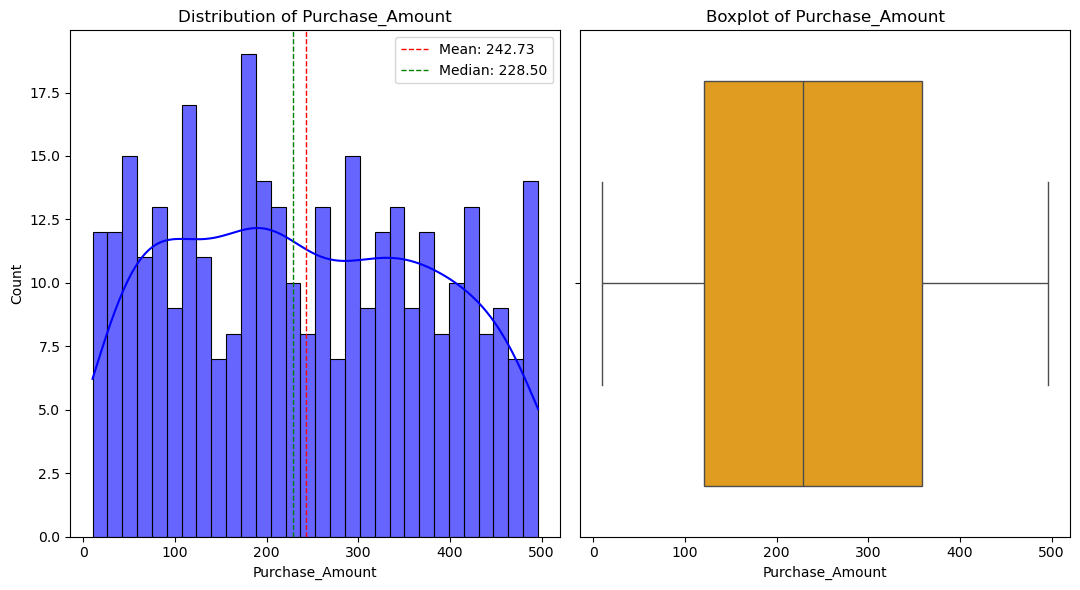

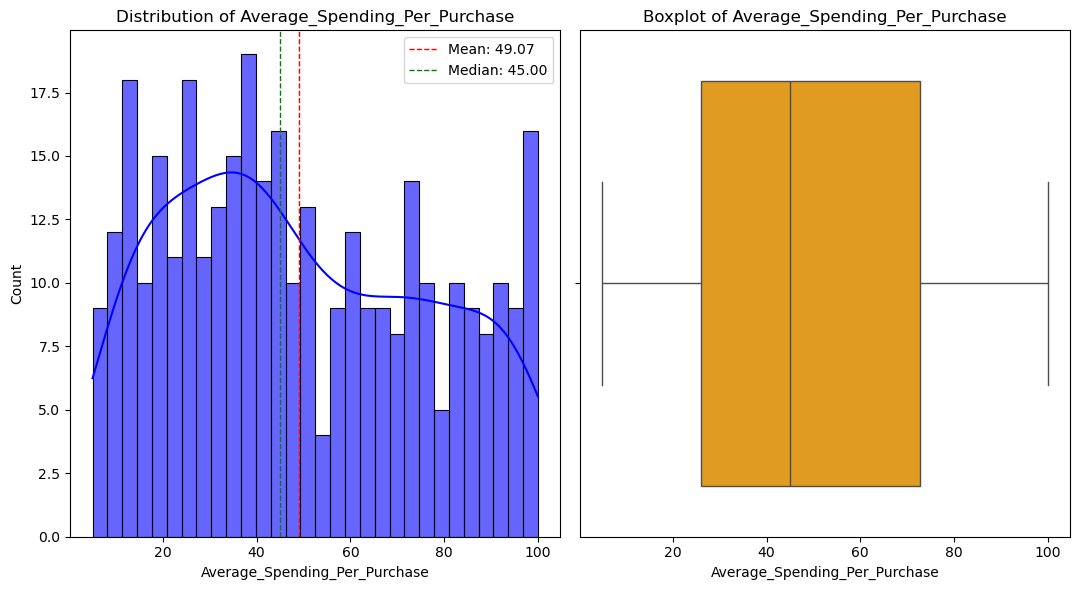

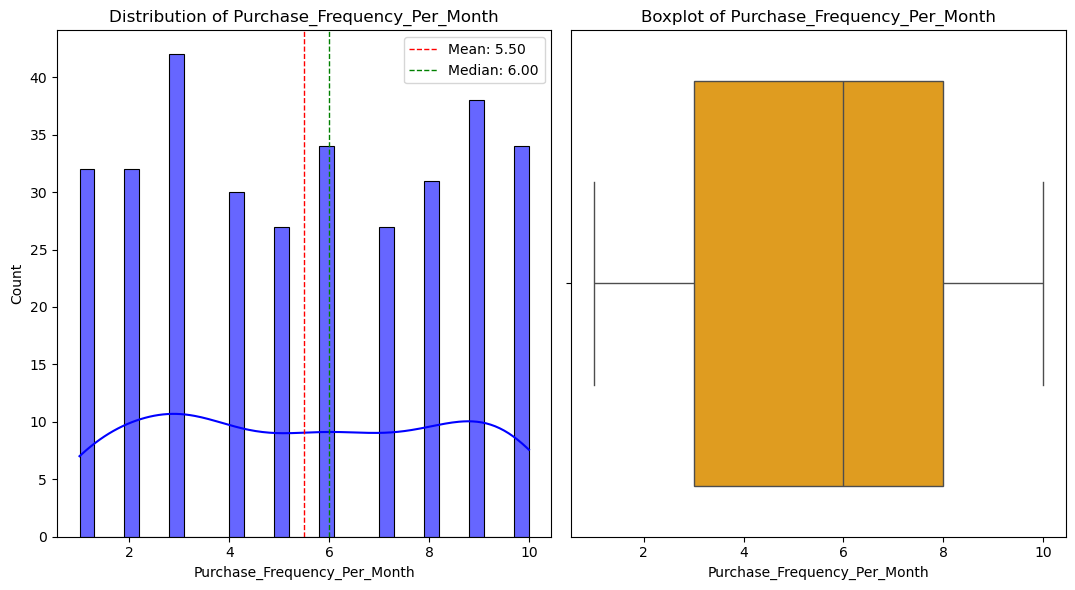

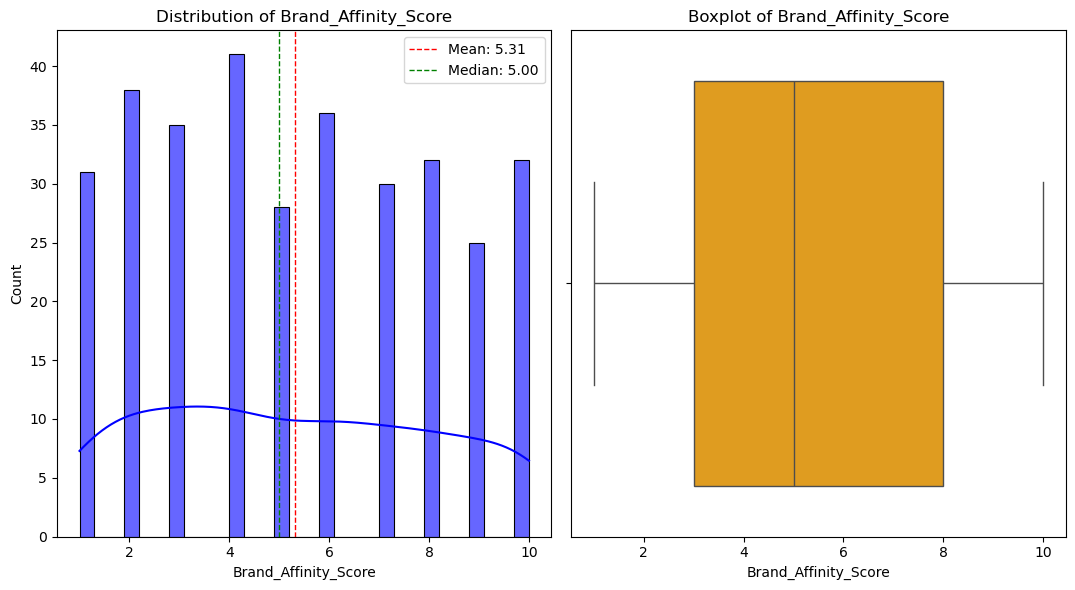

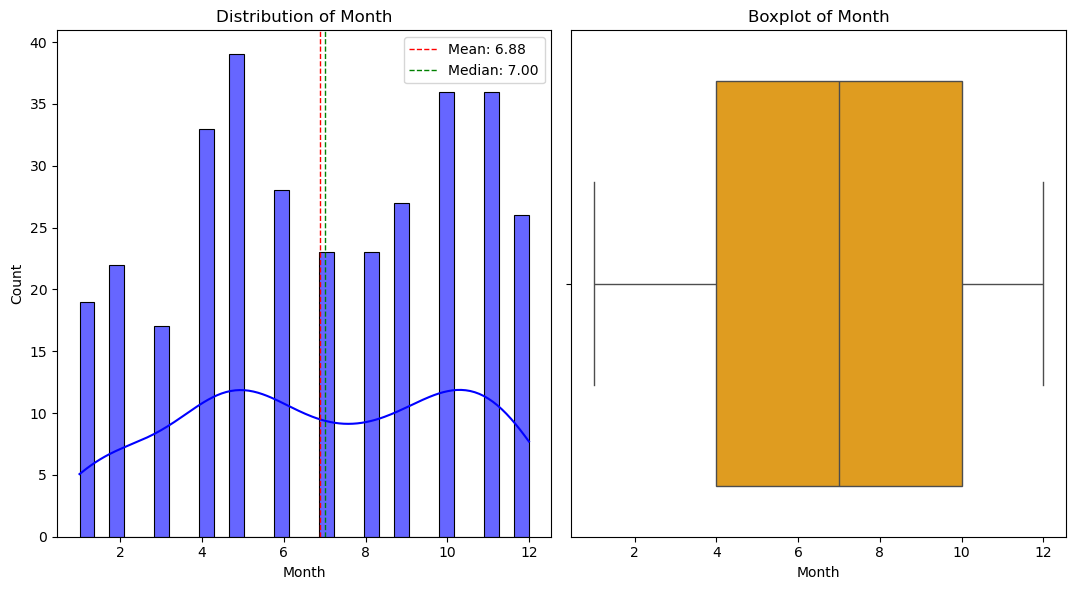

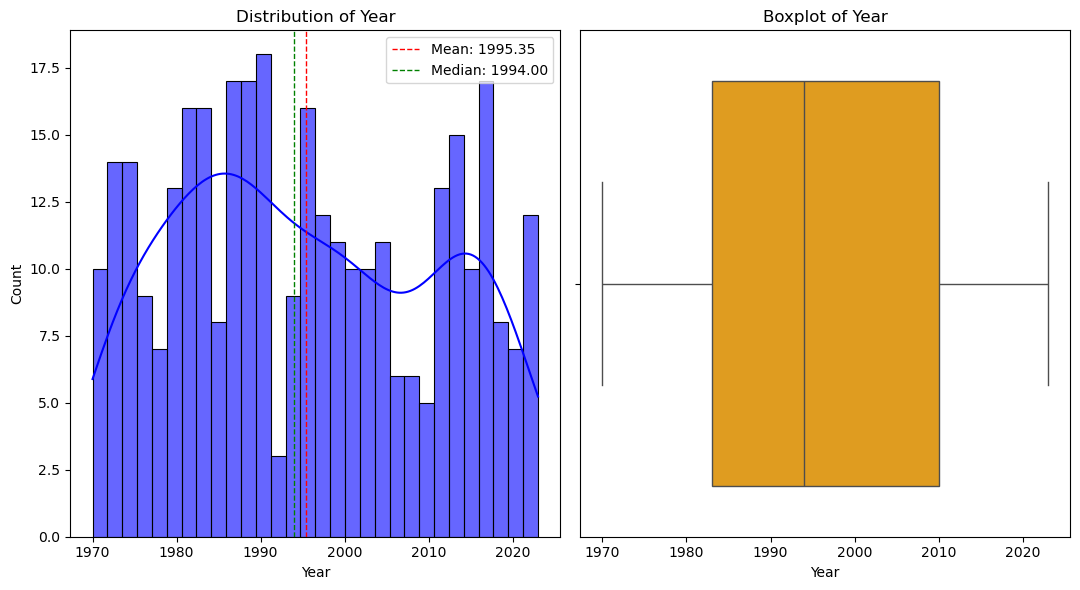

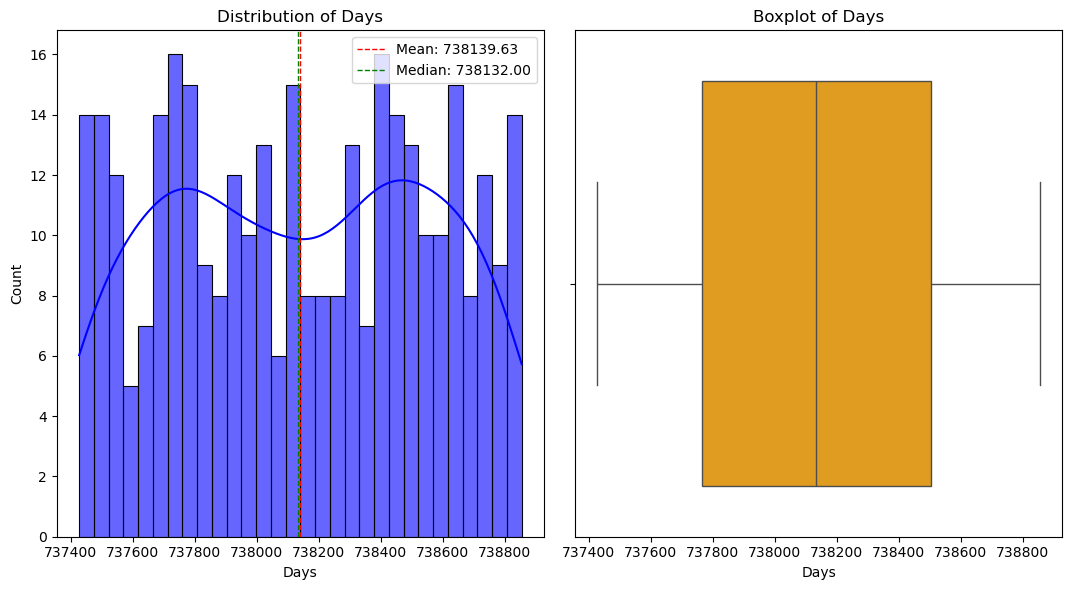

In [1189]:
int_cols_plot(df, int_columns)

In [1190]:
# # Removing NaN values from Integer columns
mean_impute_columns = [
    "Age", "Purchase_Frequency_Per_Month", "Brand_Affinity_Score", "Days"
]

median_impute_columns = [
    "Purchase_Amount", "Average_Spending_Per_Purchase"
]

log_transform_columns = [
    "Average_Spending_Per_Purchase"
]

for col in mean_impute_columns:
    mean = int(df[col].mean())
    df[col] = df[col].fillna(mean)

for col in median_impute_columns:
    median = int(df[col].median())
    df[col] = df[col].fillna(median)

In [1191]:
# Handling missing values in Categorical columns by replacing NaN values with mode
categorical_columns = ['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences']

for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].apply(lambda x: mode_value if pd.isna(x) or x == "Hidden" else x)

def fill_purchase_date(row):
    if pd.isna(row["Purchase_Date"]) or row["Purchase_Date"] == "Hidden":
        mode_date = df["Purchase_Date"].dropna()[df["Purchase_Date"] != "Hidden"].mode()[0]  # Mode of non-hidden, non-null dates
        return mode_date
    return row["Purchase_Date"]  # Keep original value if valid

# Apply the function to fill missing values in 'Purchase_Date'
df["Purchase_Date"] = df.apply(fill_purchase_date, axis=1)

In [1192]:
columns_to_drop = ['Customer_ID', 'Address', 'Transaction_ID', 'Product_ID']
df.drop(columns=columns_to_drop, inplace=True)

# Purchase_Date_Column = df.drop(['Purchase_Date'], axis=1)
# df = df.drop(['Purchase_Date'], axis=1)

In [1347]:
# Mapping months to seasons
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}

# Mode of the 'Season' column
mode_season = df['Season'].mode()[0]

# Handle NaN or 'Hidden' values in 'Season' column
df['Season'] = np.where(
    df['Season'].isin([np.nan, 'Hidden']),
    np.where(
        df['Month'].isin([np.nan, 'Hidden']),
        mode_season,  # Use mode of 'Season' if Month is missing
        df['Month'].map(month_to_season)  # Map month to season
    ),
    df['Season']
)

# Handling NaN or 'Hidden' in 'Month' column using the season-to-month mapping
season_to_month = {
    'Winter': 1,  # January
    'Spring': 4,  # April
    'Summer': 7,  # July
    'Fall': 10    # October
}

df['Month'] = np.where(
    df['Month'].isin([np.nan, 'Hidden']),
    df['Season'].map(season_to_month),  # Map season to month
    df['Month']
)

# Ensure 'Month' is of integer type (handling NaN values as Int64 type)
df['Month'] = df['Month'].astype('Int64')

# Handling NaN or 'Hidden' in 'Year' column by replacing them with the mode
year_mode = df['Year'].mode()[0]
df['Year'] = df['Year'].apply(lambda x: year_mode if x in [np.nan, 'Hidden'] else x)

# Check if any NaN values remain in 'Year' and 'Month' columns
print(df[['Year', 'Month']].isnull().sum())

Year     0
Month    0
dtype: int64


In [1349]:
df['Month'].isnull().sum()

0

In [1351]:
df.head(10)

,Age,Gender,Income_Level,Purchase_Date,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
15,54,Male,High,2023-06-03,Brand_B,272,18,10,3,Medium,4,2019.0,Winter,True,738674
16,22,Male,High,2022-01-07,Brand_C,241,26,8,5,Medium,9,1978.0,Summer,True,738162
17,68,Female,Medium,2022-06-25,Brand_B,115,31,4,4,Low,10,1972.0,Summer,True,738331
20,73,Female,High,2021-11-27,Brand_C,370,13,2,8,High,5,1991.0,Summer,True,738121
28,26,Other,Low,2020-03-04,Brand_C,257,41,10,10,Low,6,1980.0,Summer,True,737488
30,79,Female,High,2023-05-19,Brand_C,423,71,9,8,High,11,2017.0,Summer,True,738659
32,67,Male,High,2021-06-24,Brand_A,331,9,9,2,High,4,1985.0,Summer,True,737965
33,20,Other,Medium,2020-10-07,Brand_A,111,94,8,10,Low,4,1986.0,Winter,True,737705
36,49,Other,High,2021-01-18,Brand_B,284,77,10,5,High,1,1993.0,Fall,True,737808
37,54,Other,Medium,2020-05-23,Brand_C,123,84,3,8,Low,11,2000.0,Spring,True,737568


In [1353]:
df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Days
count,315.0,315.0,315.0,315.0,315.0,315.0,315.000000,315.0
mean,50.374603,240.11746,49.155556,5.457143,5.339683,6.844444,1995.676190,738140.438095
std,18.129031,135.835239,27.112022,2.787696,2.704475,3.342154,15.385179,413.756488
min,18.0,10.0,5.0,1.0,1.0,1.0,1970.000000,737427.0
25%,36.0,122.0,26.5,3.0,3.0,4.0,1983.000000,737777.0
50%,50.0,228.0,45.0,5.0,5.0,7.0,1995.000000,738139.0
75%,67.0,349.5,72.0,8.0,8.0,10.0,2010.500000,738481.5
max,80.0,496.0,100.0,10.0,10.0,12.0,2023.000000,738855.0


o Analyze outliers and determine whether to retain or remove them based on their
impact on the analysis.

In [1355]:
def remove_outliers(df, columns):
    outliers = {}
    for column in columns:

        if df[column].dtype in ['object', 'bool']:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

c = df.columns
df = remove_outliers(df, c[:-1])
df

,Age,Gender,Income_Level,Purchase_Date,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
15,54,Male,High,2023-06-03,Brand_B,272,18,10,3,Medium,4,2019.0,Winter,True,738674
16,22,Male,High,2022-01-07,Brand_C,241,26,8,5,Medium,9,1978.0,Summer,True,738162
17,68,Female,Medium,2022-06-25,Brand_B,115,31,4,4,Low,10,1972.0,Summer,True,738331
20,73,Female,High,2021-11-27,Brand_C,370,13,2,8,High,5,1991.0,Summer,True,738121
28,26,Other,Low,2020-03-04,Brand_C,257,41,10,10,Low,6,1980.0,Summer,True,737488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,60,Female,Medium,2020-12-14,Brand_A,137,39,10,1,Low,1,1988.0,Winter,True,737773
987,59,Male,Medium,2023-04-01,Brand_C,13,45,4,5,High,10,1989.0,Spring,True,738611
988,50,Male,Medium,2022-07-17,Brand_B,39,38,7,10,High,3,2004.0,Fall,True,738353
993,57,Male,Medium,2022-08-25,Brand_C,127,59,10,8,Low,5,1990.0,Fall,True,738392


o Address inconsistencies in data format and encoding.

In [1357]:
categorical_columns = ['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences', 'Season']

for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)



# Columns to drop based on the first unique values
columns_to_drop = {
    'Gender': 'Other',
    'Income_Level': 'Low',
    'Brand': 'Brand_A',
    'Product_Category_Preferences': 'Low',
    'Season': 'Winter'
}

# Drop the first dummy column for each categorical variable
for col, first_value in columns_to_drop.items():
    col_to_drop = f"{col}_{first_value}"  # Construct the column name to drop
    if col_to_drop in df_encoded.columns:
        df_encoded = df_encoded.drop(columns=[col_to_drop])

# Show the columns after dropping
print(df_encoded.columns)



Gender: ['Male' 'Female' 'Other']
Income_Level: ['High' 'Medium' 'Low']
Brand: ['Brand_B' 'Brand_C' 'Brand_A']
Product_Category_Preferences: ['Medium' 'Low' 'High']
Season: ['Winter' 'Summer' 'Fall' 'Spring']
Index(['Age', 'Purchase_Date', 'Purchase_Amount',
       'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month',
       'Brand_Affinity_Score', 'Month', 'Year', 'Will_Purchase_Next_Month',
       'Days', 'Gender_Female', 'Gender_Male', 'Income_Level_High',
       'Income_Level_Medium', 'Brand_Brand_B', 'Brand_Brand_C',
       'Product_Category_Preferences_High',
       'Product_Category_Preferences_Medium', 'Season_Fall', 'Season_Spring',
       'Season_Summer'],
      dtype='object')


In [1358]:
# # Encoding Non-Numerical data by mapping them via a dictionary
# genders = df['Gender'].unique()
# gender_map = {gender: idx for idx, gender in enumerate(genders)}
# df['Gender'] = df['Gender'].map(gender_map)

# income = df['Income_Level'].unique()
# income_map = {inc: idx for idx, inc in enumerate(income)}
# df['Income_Level'] = df['Income_Level'].map(income_map)

# # prod_cat = df['Product_Category'].unique()
# # prod_cat_map = {prod: idx for idx, prod in enumerate(prod_cat)}
# # df['Product_Category'] = df['Product_Category'].map(prod_cat_map)

# brands = df['Brand'].unique()
# brand_map = {brand: idx for idx, brand in enumerate(brands)}
# df['Brand'] = df['Brand'].map(brand_map)

# prod_cat_pref = df['Product_Category_Preferences'].unique()
# prod_cat_pref_map = {prod_cat_pref: idx for idx, prod_cat_pref in enumerate(prod_cat_pref)}
# df['Product_Category_Preferences'] = df['Product_Category_Preferences'].map(prod_cat_pref_map)

# seasons = df['Season'].unique()
# season_map = {season: idx for idx, season in enumerate(seasons)}
# df['Season'] = df['Season'].map(season_map)

# df_encoded = df.copy()

# print(df[['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences', 'Season']])

In [1359]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 15 to 995
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  315 non-null    Int64  
 1   Purchase_Date                        315 non-null    object 
 2   Purchase_Amount                      315 non-null    Int64  
 3   Average_Spending_Per_Purchase        315 non-null    Int64  
 4   Purchase_Frequency_Per_Month         315 non-null    Int64  
 5   Brand_Affinity_Score                 315 non-null    Int64  
 6   Month                                315 non-null    Int64  
 7   Year                                 315 non-null    float64
 8   Will_Purchase_Next_Month             315 non-null    bool   
 9   Days                                 315 non-null    Int64  
 10  Gender_Female                        315 non-null    bool   
 11  Gender_Male                         

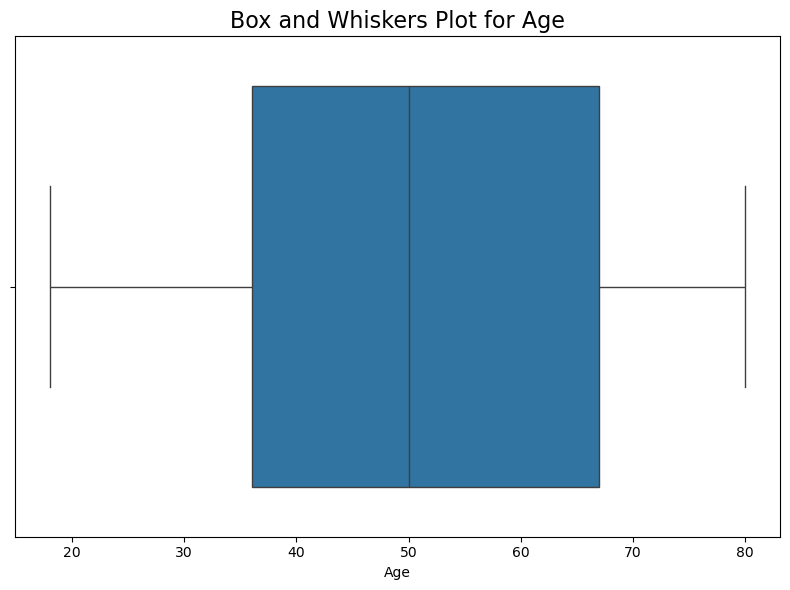

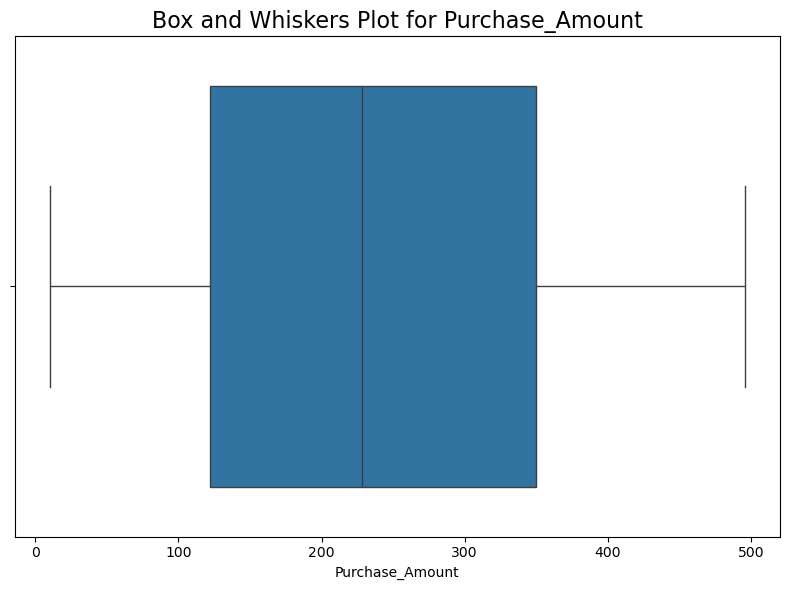

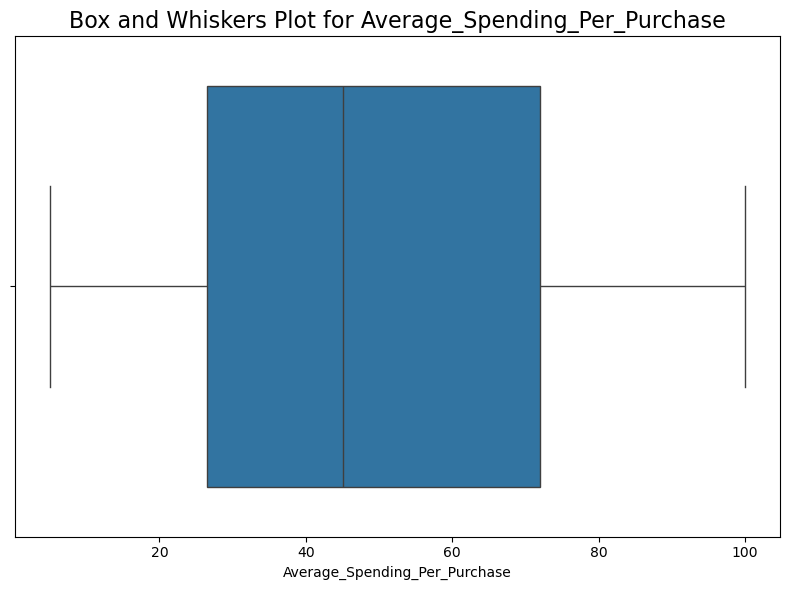

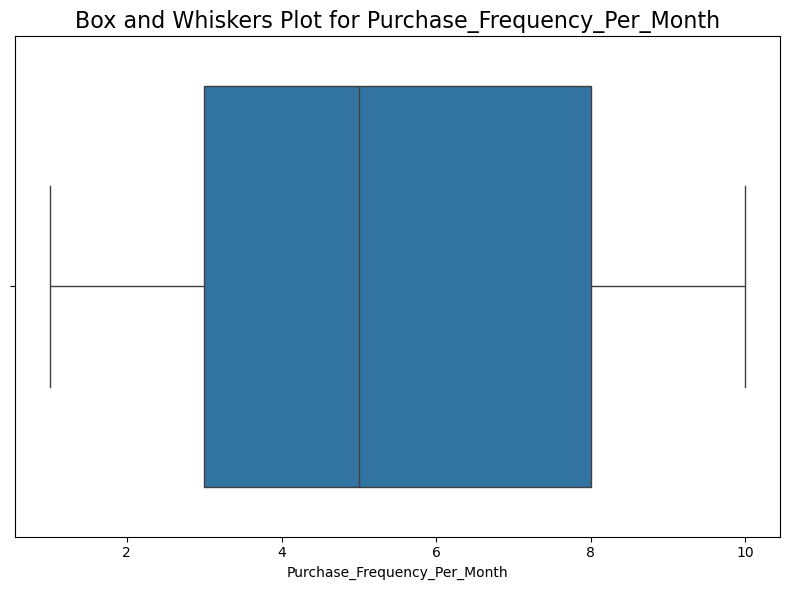

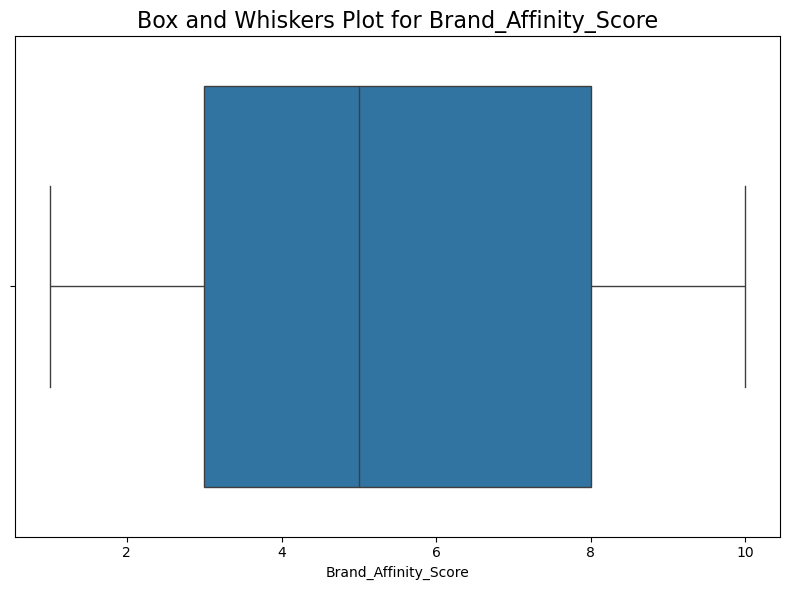

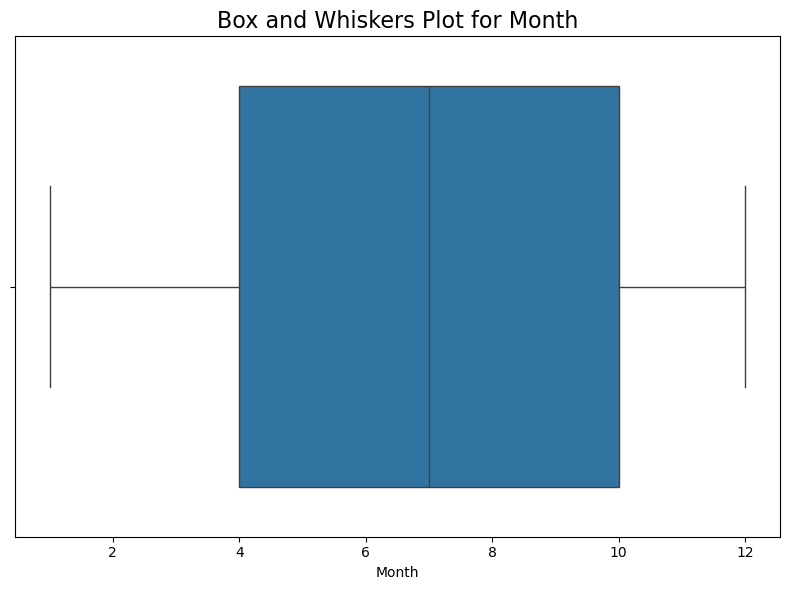

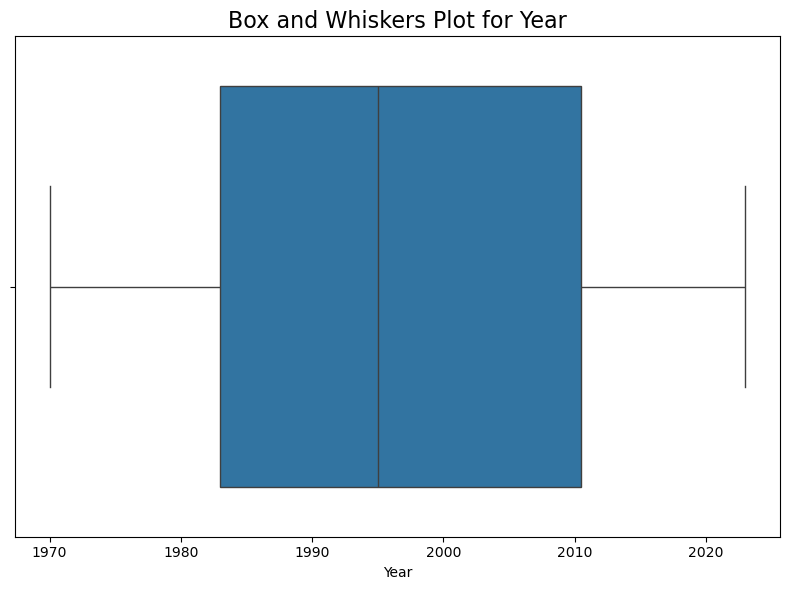

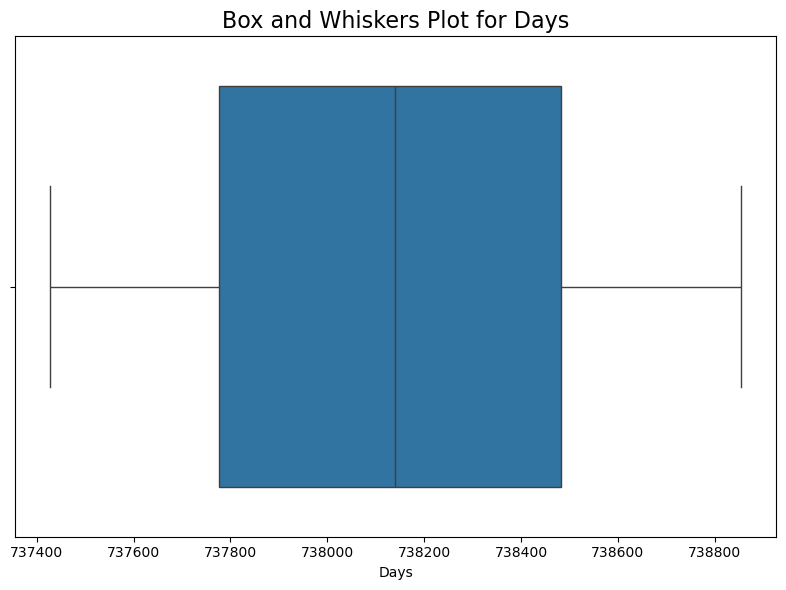

In [1360]:
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box and Whiskers Plot for {column}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [1361]:
df.head()

,Age,Gender,Income_Level,Purchase_Date,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
15,54,Male,High,2023-06-03,Brand_B,272,18,10,3,Medium,4,2019.0,Winter,True,738674
16,22,Male,High,2022-01-07,Brand_C,241,26,8,5,Medium,9,1978.0,Summer,True,738162
17,68,Female,Medium,2022-06-25,Brand_B,115,31,4,4,Low,10,1972.0,Summer,True,738331
20,73,Female,High,2021-11-27,Brand_C,370,13,2,8,High,5,1991.0,Summer,True,738121
28,26,Other,Low,2020-03-04,Brand_C,257,41,10,10,Low,6,1980.0,Summer,True,737488


### 3. Data Transformation:

o Create new features that provide deeper insights into customer behavior, such
as:

▪ Average spending per purchase

In [1365]:
df_encoded

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
15,54,2023-06-03,272,18,10,3,4,2019.0,True,738674,...,True,True,False,True,False,False,True,False,False,False
16,22,2022-01-07,241,26,8,5,9,1978.0,True,738162,...,True,True,False,False,True,False,True,False,False,True
17,68,2022-06-25,115,31,4,4,10,1972.0,True,738331,...,False,False,True,True,False,False,False,False,False,True
20,73,2021-11-27,370,13,2,8,5,1991.0,True,738121,...,False,True,False,False,True,True,False,False,False,True
28,26,2020-03-04,257,41,10,10,6,1980.0,True,737488,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,60,2020-12-14,137,39,10,1,1,1988.0,True,737773,...,False,False,True,False,False,False,False,False,False,False
987,59,2023-04-01,13,45,4,5,10,1989.0,True,738611,...,True,False,True,False,True,True,False,False,True,False
988,50,2022-07-17,39,38,7,10,3,2004.0,True,738353,...,True,False,True,True,False,True,False,True,False,False
993,57,2022-08-25,127,59,10,8,5,1990.0,True,738392,...,True,False,True,False,True,False,False,True,False,False


▪ Purchase frequency per month

▪ Brand affinity score (based on product brand preferences)

▪ Product category preferences (e.g., TVs, smartphones, laptops)

o Standardize or normalize numeric features to ensure they contribute equally to
the given algorithms.

In [1373]:
columns_to_standardize = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

Scaled_df = df_encoded.copy()
Scaled_df[columns_to_standardize] = scaler.fit_transform(Scaled_df[columns_to_standardize])

KMeans_df = Scaled_df.copy()
MLRM_df = Scaled_df.copy()

# MLRM_df = df_encoded.copy()

Scaled_df

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
15,0.200296,2023-06-03,0.235088,-1.150970,1.632203,-0.866492,-0.852435,1.518404,True,1.291607,...,True,True,False,True,False,False,True,False,False,False
16,-1.567638,2022-01-07,0.006507,-0.855429,0.913623,-0.125800,0.645986,-1.150738,True,0.052195,...,True,True,False,False,True,False,True,False,False,True
17,0.973766,2022-06-25,-0.922563,-0.670715,-0.523537,-0.496146,0.945670,-1.541345,True,0.461298,...,False,False,True,True,False,False,False,False,False,True
20,1.250006,2021-11-27,0.957698,-1.335684,-1.242117,0.985238,-0.552751,-0.304425,True,-0.047054,...,False,True,False,False,True,True,False,False,False,True
28,-1.346646,2020-03-04,0.124485,-0.301288,1.632203,1.725929,-0.253067,-1.020536,True,-1.579374,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.531783,2020-12-14,-0.760344,-0.375174,1.632203,-1.607183,-1.751488,-0.499728,True,-0.889467,...,False,False,True,False,False,False,False,False,False,False
987,0.476535,2023-04-01,-1.674667,-0.153517,-0.523537,-0.125800,0.945670,-0.434627,True,1.139101,...,True,False,True,False,True,True,False,False,True,False
988,-0.020696,2022-07-17,-1.482954,-0.412116,0.554333,1.725929,-1.152120,0.541889,True,0.514554,...,True,False,True,True,False,True,False,True,False,False
993,0.366039,2022-08-25,-0.834080,0.363680,1.632203,0.985238,-0.552751,-0.369526,True,0.608962,...,True,False,True,False,True,False,False,True,False,False


## **Module 2: Exploratory Data Analysis (EDA):**

### 1. Univariate Analysis:

o Analyze the distribution of key features like customer age, purchase amount,
and purchase frequency using histograms, boxplots, and descriptive statistics.

o Identify potential skewness or outliers in the data.

### 2. Bivariate Analysis:

o Utilize scatterplots and heatmaps to explore relationships between different
features, such as purchase amount vs. income level, brand affinity vs. product
category, and purchase frequency vs. age.

o Investigate the presence of correlations and identify any impactful
relationships.

### 3. Temporal Analysis:

o Analyse trends in customer behaviour over time, including changes in
purchase frequency, average spending, and product preferences.

o Identify seasonal variations or any significant shifts in customer behavior
patterns.

## **Module 3: Regression and Decision Tree Analysis:**

### **A. Linear Regression Analysis:**

### 1. Problem Definition:

• Predict the average spending per purchase based on customer demographics and
purchase history.

In [1396]:
MLRM_df

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
15,0.200296,2023-06-03,0.235088,-1.150970,1.632203,-0.866492,-0.852435,1.518404,True,1.291607,...,True,True,False,True,False,False,True,False,False,False
16,-1.567638,2022-01-07,0.006507,-0.855429,0.913623,-0.125800,0.645986,-1.150738,True,0.052195,...,True,True,False,False,True,False,True,False,False,True
17,0.973766,2022-06-25,-0.922563,-0.670715,-0.523537,-0.496146,0.945670,-1.541345,True,0.461298,...,False,False,True,True,False,False,False,False,False,True
20,1.250006,2021-11-27,0.957698,-1.335684,-1.242117,0.985238,-0.552751,-0.304425,True,-0.047054,...,False,True,False,False,True,True,False,False,False,True
28,-1.346646,2020-03-04,0.124485,-0.301288,1.632203,1.725929,-0.253067,-1.020536,True,-1.579374,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.531783,2020-12-14,-0.760344,-0.375174,1.632203,-1.607183,-1.751488,-0.499728,True,-0.889467,...,False,False,True,False,False,False,False,False,False,False
987,0.476535,2023-04-01,-1.674667,-0.153517,-0.523537,-0.125800,0.945670,-0.434627,True,1.139101,...,True,False,True,False,True,True,False,False,True,False
988,-0.020696,2022-07-17,-1.482954,-0.412116,0.554333,1.725929,-1.152120,0.541889,True,0.514554,...,True,False,True,True,False,True,False,True,False,False
993,0.366039,2022-08-25,-0.834080,0.363680,1.632203,0.985238,-0.552751,-0.369526,True,0.608962,...,True,False,True,False,True,False,False,True,False,False


In [1397]:
df_encoded

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
15,54,2023-06-03,272,18,10,3,4,2019.0,True,738674,...,True,True,False,True,False,False,True,False,False,False
16,22,2022-01-07,241,26,8,5,9,1978.0,True,738162,...,True,True,False,False,True,False,True,False,False,True
17,68,2022-06-25,115,31,4,4,10,1972.0,True,738331,...,False,False,True,True,False,False,False,False,False,True
20,73,2021-11-27,370,13,2,8,5,1991.0,True,738121,...,False,True,False,False,True,True,False,False,False,True
28,26,2020-03-04,257,41,10,10,6,1980.0,True,737488,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,60,2020-12-14,137,39,10,1,1,1988.0,True,737773,...,False,False,True,False,False,False,False,False,False,False
987,59,2023-04-01,13,45,4,5,10,1989.0,True,738611,...,True,False,True,False,True,True,False,False,True,False
988,50,2022-07-17,39,38,7,10,3,2004.0,True,738353,...,True,False,True,True,False,True,False,True,False,False
993,57,2022-08-25,127,59,10,8,5,1990.0,True,738392,...,True,False,True,False,True,False,False,True,False,False


In [1398]:
X = MLRM_df[['Age', 'Gender_Female', 'Gender_Male',
             'Income_Level_High', 'Income_Level_Medium',
             'Purchase_Amount', 'Purchase_Frequency_Per_Month', 
             'Product_Category_Preferences_High', 
             'Product_Category_Preferences_Medium'
            ]]

y = MLRM_df['Average_Spending_Per_Purchase']

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Mean Absolute Error (to assess model performance)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R^2 Score: -0.08161323241535623
Mean Absolute Error: 0.9194950625868671


### 2. Model Building:

• Preprocess the data by selecting relevant numerical and categorical variables (e.g.,
income level, product category, age).

• Split the dataset into training and testing sets.

### 3. Implementation:

• Train a linear regression model using the training data.

• Evaluate the model using metrics such as Mean Absolute Error (MAE), Mean
Squared Error (MSE), and R-squared.

### 4. Visualization:

• Plot the predicted vs. actual values for the test dataset.

• Include regression lines for better interpretability.

### **B. Decision Tree Analysis:**

### 1. Problem Definition:

• Classify whether a customer will make a purchase in the next month (use a binary
target variable).

### 2. Model Building:

• Engineer a binary target variable (e.g., 1 = purchase made, 0 = no purchase).

• Use features like purchase frequency, spending history, and product preferences.

### 3. Implementation:

• Train a decision tree classifier and use criteria such as Gini Impurity or
Entropy.

In [1433]:
X = df_encoded[['Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase', 
                'Purchase_Amount', 'Product_Category_Preferences_High',
                'Product_Category_Preferences_Medium',
                'Brand_Affinity_Score', 'Age', 
                'Season_Fall', 'Season_Summer']]

y = df_encoded['Will_Purchase_Next_Month']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

• Evaluate the model using metrics such as Accuracy, Precision, Recall, and F1
Score.

In [1435]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Accuracy: 0.9157894736842105
Precision: 0.9342105263157895
Recall: 0.9594594594594594
F1 Score: 0.9466666666666667

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.76      0.80        21
        True       0.93      0.96      0.95        74

    accuracy                           0.92        95
   macro avg       0.89      0.86      0.87        95
weighted avg       0.91      0.92      0.91        95


Feature Importance:
                                Feature  Importance
0         Purchase_Frequency_Per_Month    0.687873
1        Average_Spending_Per_Purchase    0.099853
5                 Brand_Affinity_Score    0.081599
2                      Purchase_Amount    0.072212
6                                  Age    0.058463
3    Product_Category_Preferences_High    0.000000
4  Product_Category_Preferences_Medium    0.000000
7                          Season_Fall    0.000000
8                        Season_Summer    0.000000


### 4. Visualization:

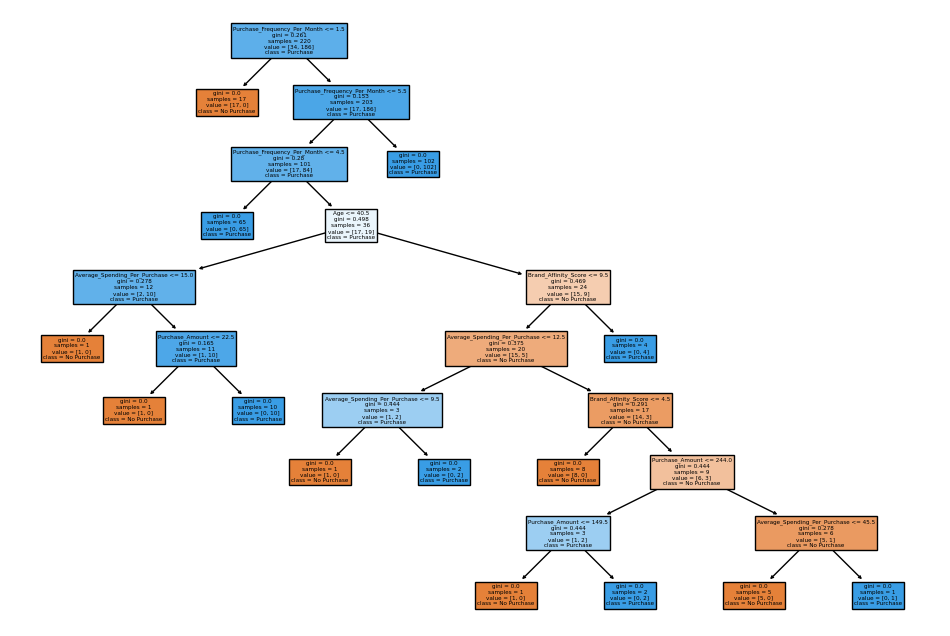

In [1451]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()

• Plot the decision tree.

• Highlight important features that influence the decision.

## **Module 4: Clustering Analysis:**

(Hint: Remove the predicted label and then apply K-Means Clustering)

In [1458]:
X = KMeans_df.drop(columns=['Will_Purchase_Next_Month', 'Purchase_Date'])

### 1. Define the number of clusters(k):

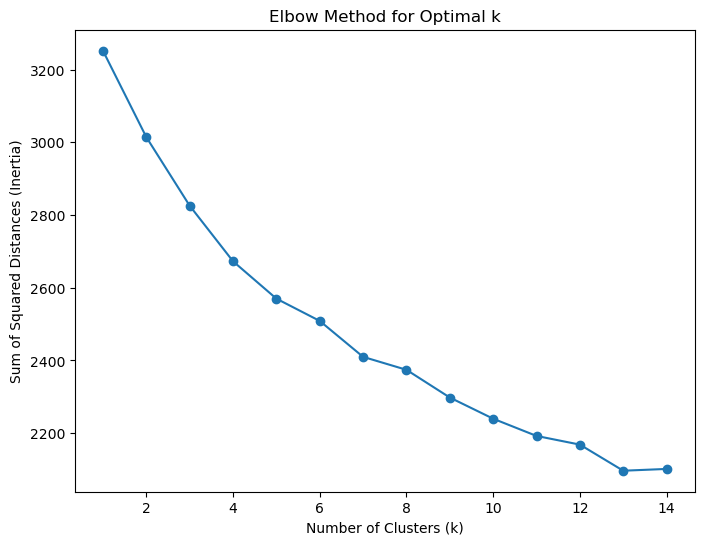

The optimal number of clusters (k) is: 12
[3252.000000000001, 3014.3220384658007, 2825.593696674314, 2672.708946535503, 2569.9185664687493, 2508.6476079519643, 2409.794643064742, 2374.164888018117, 2297.9000600487816, 2239.6381371031803, 2192.25976847963, 2168.384690483321, 2096.5594282640386, 2101.478810439942]


In [1460]:
inertia = []
range_k = range(1, 15)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

inertia_diff = np.diff(inertia)
inertia_second_diff = np.diff(inertia_diff)

# Find the index where the second derivative is maximum (this corresponds to the elbow)
optimal_k = np.argmin(inertia_second_diff) + 2


plt.figure(figsize=(8, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

print(f"The optimal number of clusters (k) is: {optimal_k}")
print(inertia)

• Analyze the elbow plot to determine the optimal number of clusters based on the
sum of squared distances within each other.

### 2. Apply K-Means Clustering:

In [1464]:
optimal_k = 8

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
df_encoded['Cluster'] = clusters

# Display the cluster centers (mean of each feature for each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers (mean of features per cluster):")
cluster_centers

Cluster Centers (mean of features per cluster):


,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Days,Gender_Female,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
0,-0.820064,0.240849,0.502215,0.891167,0.290839,-0.065764,-0.922885,-0.600795,0.218750,0.406250,0.375000,0.343750,0.437500,0.343750,0.281250,0.437500,0.437500,0.156250,0.281250
1,0.292028,-0.616768,-0.115181,0.805158,-0.321454,0.131434,-0.656953,0.888533,0.339623,0.396226,0.188679,0.490566,0.377358,0.377358,0.358491,0.358491,0.264151,0.169811,0.301887
2,-0.097103,0.313374,-1.004771,-0.508248,0.473057,0.084875,-0.834929,-0.082026,0.340426,0.276596,0.340426,0.319149,0.148936,0.468085,0.148936,0.404255,0.191489,0.212766,0.212766
3,-0.934214,-0.475004,0.581041,-0.573670,-0.401406,-0.050954,0.738706,0.418007,0.325581,0.279070,0.279070,0.418605,0.302326,0.581395,0.418605,0.395349,0.232558,0.255814,0.302326
4,-0.181417,0.905860,-0.082990,0.695872,0.412885,0.119268,0.910794,-0.731239,0.393939,0.272727,0.303030,0.484848,0.393939,0.272727,0.272727,0.333333,0.212121,0.333333,0.333333
5,0.632753,0.273736,-0.257976,-0.858048,0.563810,0.956004,0.517195,-0.511249,0.379310,0.172414,0.275862,0.413793,0.310345,0.344828,0.241379,0.448276,0.275862,0.206897,0.068966
6,0.860201,0.136159,-0.307445,-0.044484,-0.701894,0.138188,1.122373,0.690527,0.250000,0.250000,0.250000,0.361111,0.138889,0.638889,0.416667,0.388889,0.222222,0.250000,0.166667
7,0.289745,-0.287031,0.799076,-0.455101,-0.046440,-1.030819,-0.324575,-0.663994,0.285714,0.214286,0.285714,0.452381,0.285714,0.452381,0.238095,0.404762,0.214286,0.404762,0.166667


• Implement K-means with the chosen k value to segment customers into distinct
clusters based on their purchase behavior and preferences.

### 3. Analyze cluster characteristics:

In [1468]:
cluster_analysis = df_encoded.groupby('Cluster').agg({
    'Purchase_Amount': 'mean',
    'Average_Spending_Per_Purchase': 'mean',
    'Purchase_Frequency_Per_Month': 'mean',
    'Brand_Affinity_Score': 'mean',
    'Product_Category_Preferences_High': 'mean',
    'Product_Category_Preferences_Medium': 'mean',
    'Season_Fall': 'mean',
    'Season_Summer': 'mean',
}).reset_index()

print("Cluster Characteristics:")
cluster_analysis 

Cluster Characteristics:


,Cluster,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Summer
0,0,272.78125,62.75,7.9375,6.125,0.281250,0.437500,0.437500,0.281250
1,1,156.471698,46.037736,7.698113,4.471698,0.358491,0.358491,0.264151,0.301887
2,2,282.617021,21.957447,4.042553,6.617021,0.148936,0.404255,0.191489,0.212766
3,3,175.697674,64.883721,3.860465,4.255814,0.418605,0.395349,0.232558,0.302326
4,4,362.969697,46.909091,7.393939,6.454545,0.272727,0.333333,0.212121,0.333333
5,5,277.241379,42.172414,3.068966,6.862069,0.241379,0.448276,0.275862,0.068966
6,6,258.583333,40.833333,5.333333,3.444444,0.416667,0.388889,0.222222,0.166667
7,7,201.190476,70.785714,4.190476,5.214286,0.238095,0.404762,0.214286,0.166667


• Investigate key features of each cluster, such as average purchase amount, brand
affinity and product category preferences.

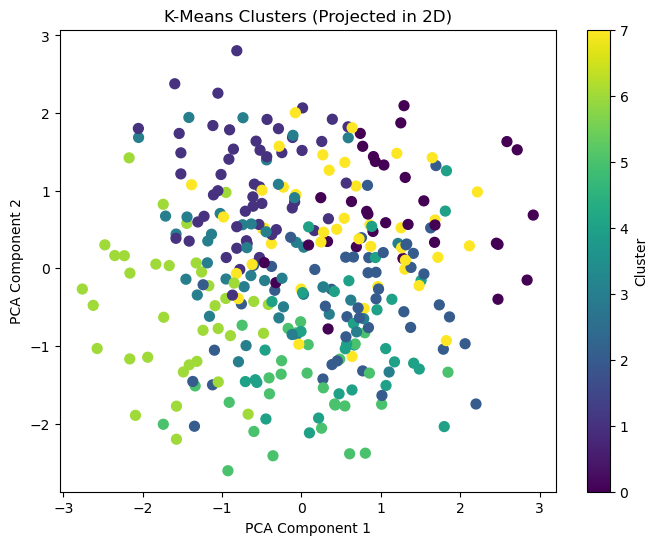

In [1470]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters (Projected in 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


• Identify significant differences and similarities between clusters.

## **Module 5: Comparison and Conclusion:**

### 1. Compare the predictive performance of the regression,decision tree and K-Means
Clustering models.

• Discuss strengths, limitations, and real-world applicability in the context of
customer behavior analysis.

### 2. Provide actionable recommendations for the electronics section based on the results.